In [ ]:
# discriminante
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import RepeatedStratifiedKFold
from sklearn.model_selection  import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [ ]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv("suscripcion-discriminante.csv", delimiter=",")
datos

,Educacion,Edad,Tvdiario,Organizaciones,Hijos,Suscripcion
0,12,18,3,0,0,0
1,12,19,2,0,0,0
2,11,20,1,0,0,0
3,12,20,3,1,1,0
4,12,20,4,0,1,1
...,...,...,...,...,...,...
437,12,77,8,1,4,1
438,8,81,4,2,5,1
439,8,84,4,0,3,1
440,12,85,6,0,0,1


Visualizacion de datos

In [ ]:
print (datos.groupby('Suscripcion').size())

Suscripcion
0    113
1    329
dtype: int64


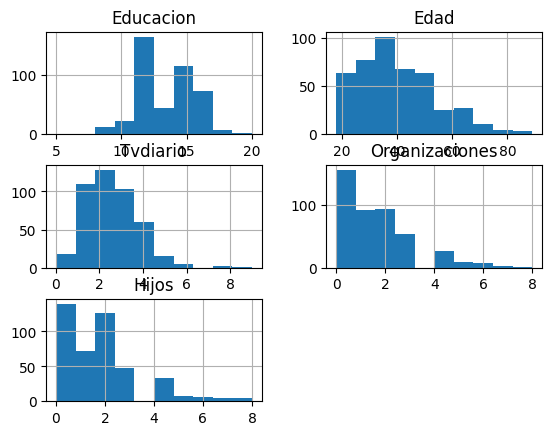

In [ ]:
# Histogramas
datos.drop(["Suscripcion"], axis=1).hist()
plt.show()


In [ ]:
datos.describe()

,Educacion,Edad,Tvdiario,Organizaciones,Hijos,Suscripcion
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,13.377828,40.187783,2.364253,1.524887,1.683258,0.744344
std,2.146506,13.766387,1.348851,1.595221,1.660298,0.436724
min,5.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,30.000000,1.000000,0.000000,0.000000,0.000000
50%,13.000000,38.000000,2.000000,1.000000,2.000000,1.000000
75%,15.000000,48.000000,3.000000,2.000000,2.000000,1.000000
max,20.000000,89.000000,9.000000,8.000000,8.000000,1.000000


**Seleccion de caracteristicas o Feature Selection**

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler


Dividiendo los datos en training y test

In [ ]:
# Dividir los datos en características (X) y variables objetivo (y)
#x=datos.drop (["Suscripcion"], axis=1)
#y=datos["Suscripcion"]

# best=SelectionBest (k=4)
# x_new = best.fit_transform(x,y)
# x_new.shape
# selected = best.get.support(indices=True)
# print(x.columns[selected])

In [ ]:
x = datos[["Educacion", "Edad",	"Tvdiario",	"Organizaciones","Hijos"]]
y = datos['Suscripcion']

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Escalando los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#import the library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#crear el modelo LDA
lda = LinearDiscriminantAnalysis()
# entrenar el modelo
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# realizar predicciones
y_pred = lda.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0])

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Imprimir los resultados
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n")
print(report)

Accuracy: 0.8314606741573034
Confusion Matrix:
 [[19  8]
 [ 7 55]]
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.87      0.89      0.88        62

    accuracy                           0.83        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.83      0.83      0.83        89



In [ ]:
# Predicción para nuevas observaciones
new_observations = np.array([[12, 18, 3, 0, 0], [0, 0, 0, 0,0]])
predictions = lda.predict(new_observations)
print(f'Predicciones para nuevas observaciones: {predictions}')

Predicciones para nuevas observaciones: [1 1]


In [ ]:
print(lda.predict([[0,12,18,3,0]]))

[1]


In [ ]:
print(lda.predict([[0,0,0,0,0]]))

[1]


In [ ]:
# Prueba de normalidad univariante (Anderson-Darling)
print("Prueba de normalidad univariante:")
resultados_normalidad = []
for feature in x.columns:
    stat, crit, sig = stats.anderson(x[feature])
    crit_val = crit[2]  # Obtener el primer elemento del criterio crítico
    resultados_normalidad.append((feature, stat, crit_val, sig))
    print(f"{feature}: Estadístico = {stat:.4f}, Criterio = {crit_val:.4f}, Niveles de significancia = {sig}")

Prueba de normalidad univariante:
Educacion: Estadístico = 18.5921, Criterio = 0.7800, Niveles de significancia = [15.  10.   5.   2.5  1. ]
Edad: Estadístico = 5.6587, Criterio = 0.7800, Niveles de significancia = [15.  10.   5.   2.5  1. ]
Tvdiario: Estadístico = 12.8747, Criterio = 0.7800, Niveles de significancia = [15.  10.   5.   2.5  1. ]
Organizaciones: Estadístico = 20.4487, Criterio = 0.7800, Niveles de significancia = [15.  10.   5.   2.5  1. ]
Hijos: Estadístico = 18.2584, Criterio = 0.7800, Niveles de significancia = [15.  10.   5.   2.5  1. ]


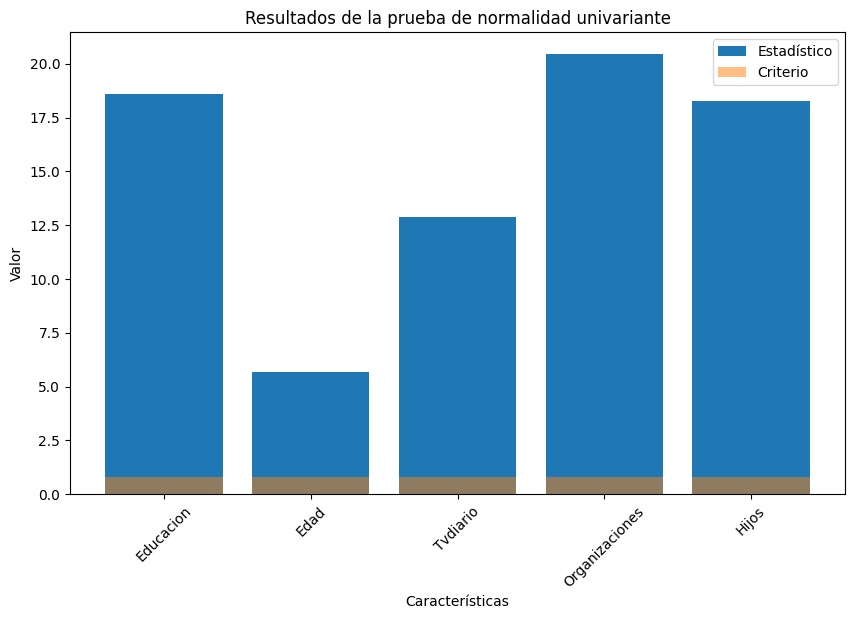

In [ ]:
# Graficar los resultados de la prueba de normalidad
fig, ax = plt.subplots(figsize=(10, 6))
features = [result[0] for result in resultados_normalidad]
estadisticos = [result[1] for result in resultados_normalidad]
crit_valores = [result[2] for result in resultados_normalidad]
significancia = [result[3] for result in resultados_normalidad]

ax.bar(features, estadisticos, label='Estadístico')
ax.bar(features, crit_valores, label='Criterio', alpha=0.5)
ax.set_ylabel('Valor')
ax.set_xlabel('Características')
ax.set_title('Resultados de la prueba de normalidad univariante')
ax.legend()
plt.xticks(rotation=45)
plt.show()


Gráfico de normalidad multivariante:


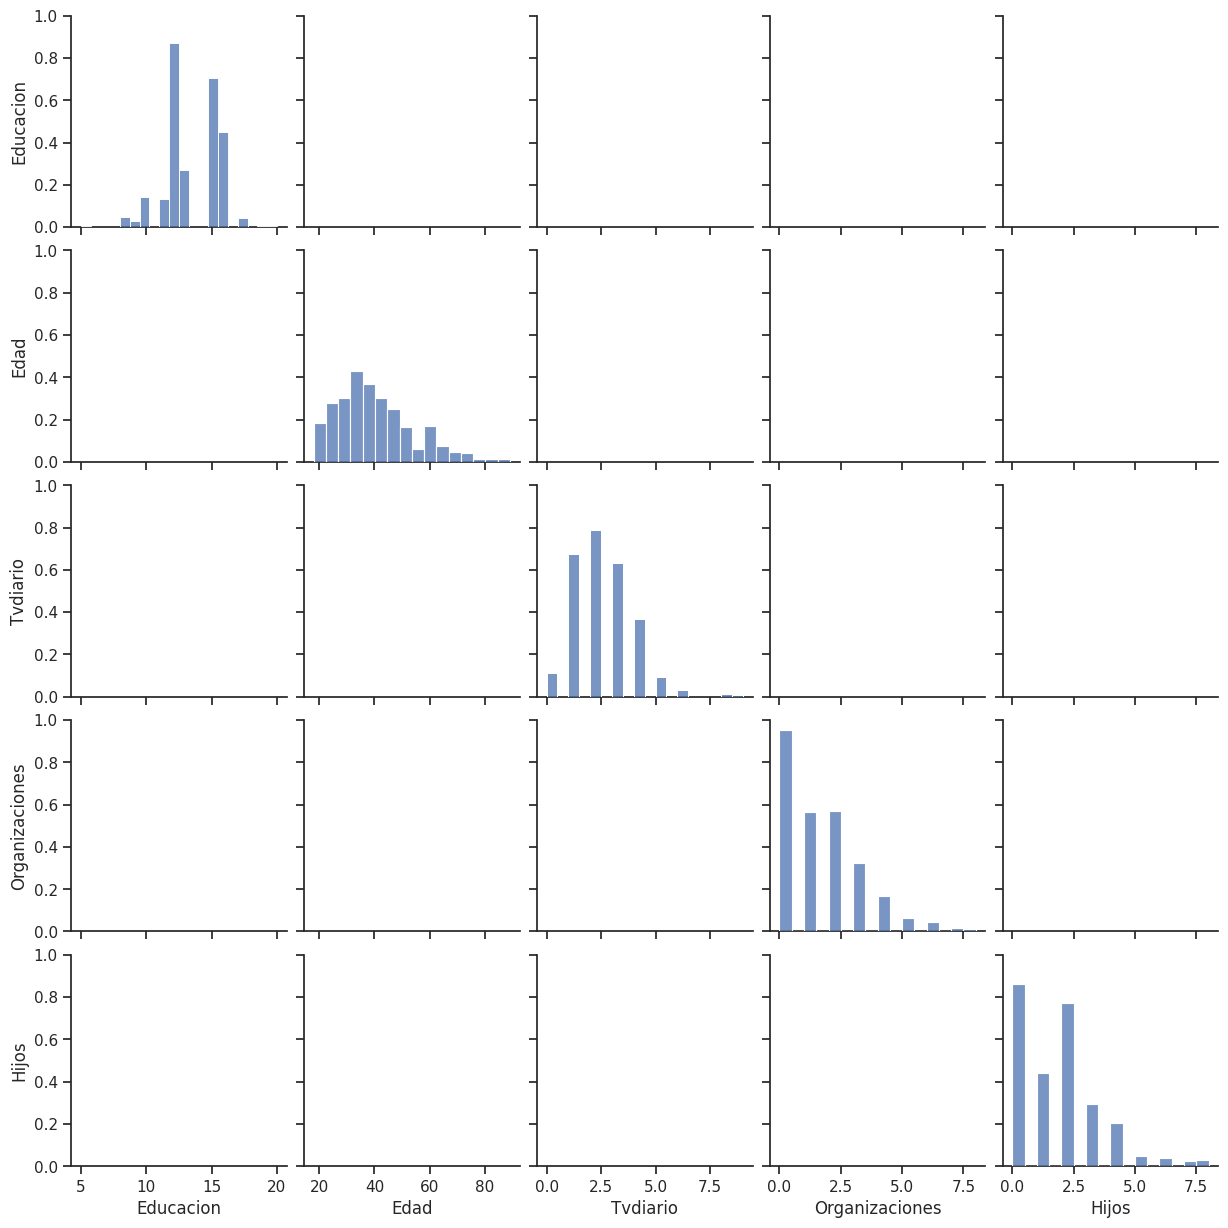

In [ ]:
# Gráfico de normalidad multivariante (Q-Q plot)
print("\nGráfico de normalidad multivariante:")
sb.set(style="ticks")
sb.pairplot(x, kind="qq", plot_kws={'line':'45'})
plt.show()

In [ ]:
# Prueba de homogeneidad de varianza (Levene)
print("\nPrueba de homogeneidad de varianza:")
stat, p_value = stats.levene(x['Educacion'], x['Edad'], x['Tvdiario'],x['Organizaciones'],x['Hijos'])
print(f"Estadístico de Levene: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")


Prueba de homogeneidad de varianza:
Estadístico de Levene: 488.3777
Valor p: 0.0000


**CON NAIVE BAYES**


In [ ]:
datos = pd.read_csv("suscripcion-discriminante.csv", delimiter=",")
datos

,Educacion,Edad,Tvdiario,Organizaciones,Hijos,Suscripcion
0,12,18,3,0,0,0
1,12,19,2,0,0,0
2,11,20,1,0,0,0
3,12,20,3,1,1,0
4,12,20,4,0,1,1
...,...,...,...,...,...,...
437,12,77,8,1,4,1
438,8,81,4,2,5,1
439,8,84,4,0,3,1
440,12,85,6,0,0,1


In [ ]:
x = datos[["Educacion", "Edad",	"Tvdiario",	"Organizaciones","Hijos"]]
y = datos['Suscripcion']

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA()

In [ ]:
# x_train=lda.fit_transform(x_train,y_train)
# x_test = lda.transform(x_test)

In [ ]:
# print("original data:",x.shape[1])

In [ ]:
# print("original data:",x_train.shape[1])

In [ ]:
# training PCA
# x_train = lda.fit_transform(x_train,y_train)

In [ ]:
#  making predictions on test data
# x_test= lda.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_predNB =gnb.predict(x_test)

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_predNB)
conf_matrix = confusion_matrix(y_test, y_predNB)

In [ ]:
#print(accuracy_score(y_test,y_pred))
# Imprimir los resultados
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8876404494382022
Confusion Matrix:
 [[18  9]
 [ 1 61]]


proyectar
	Educacion	Edad	Tvdiario	Organizaciones	Hijos	Suscripcion
0	12	18	3	0	0

In [ ]:
LinearDiscriminantAnalysis()
print(gnb.predict([[0,12,18,3,0]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Guardando el  modelo
archivo_modelo = open("modelo_discriminante.sav","wb")

In [ ]:
from pickle import dump
dump(gnb,archivo_modelo)

prediciendo nuevos valores

In [ ]:
# " Educacion Edad Tvdiario Organizaciones Hijos"
para_pred = [(0,12,18,3,0)]
para_pred

[(0, 12, 18, 3, 0)]

In [ ]:
from pickle import load
modelo_cargado =load(open("modelo_discriminante.sav","wb"))

UnsupportedOperation: read

In [ ]:
prediccion_nuevos= modelo_cargado.predict(para_pred)

**REVISAR ESTE SCRIPT CLASIFICACIO CON LDA **

https://qu4nt.github.io/sklearn-doc-es/auto_examples/applications/plot_face_recognition.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
lfw_people

In [ ]:
# Obtener las características y las etiquetas
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Número de clases: {n_classes}")

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia de LDA con n_components adecuado
lda = LDA(n_components=n_classes - 1)

# Ajustar LDA al conjunto de entrenamiento y transformar los datos
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
# Entrenar el clasificador LDA
lda_classifier = LDA()
lda_classifier.fit(X_train_lda, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lda_classifier.predict(X_test_lda)

# Calcular la precisión
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

In [ ]:
# Seleccionar aleatoriamente algunas imágenes de prueba
random_indices = np.random.choice(len(X_test), 5, replace=False)
X_samples = X_test[random_indices]
y_samples = y_test[random_indices]

# Transformar las muestras seleccionadas
X_samples_lda = lda.transform(X_samples)

# Realizar predicciones
y_pred_samples = lda_classifier.predict(X_samples_lda)

# Mostrar las imágenes y las predicciones
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_samples[i].reshape(50, 37), cmap='gray')
    plt.title(f"Real: {target_names[y_samples[i]]}\nPredicción: {target_names[y_pred_samples[i]]}")
    plt.axis('off')

plt.show()